Centroides encontrados por k-Means:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Asignación de clústers para cada muestra (primeros 10):
[1 1 1 1 1 1 1 1 1 1]

Matriz de confusión entre clústers y especies reales:
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


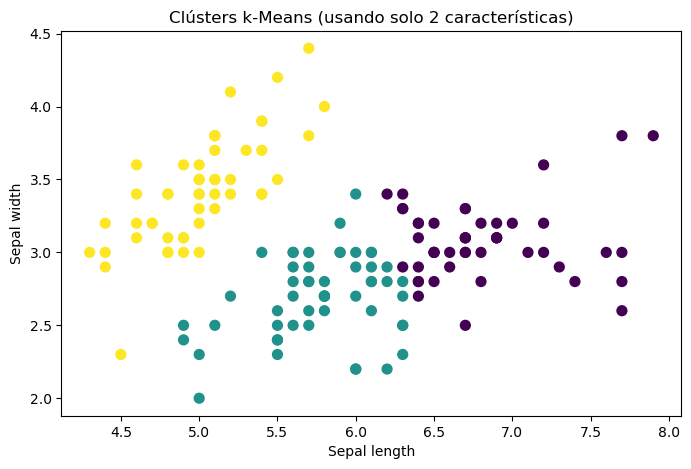

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# 1. Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data         # Características: Largo/Ancho de pétalo y sépalo
y_true = iris.target  # Etiquetas verdaderas (0, 1, 2) para cada especie

# 2. Aplicar k-Means
# Elegimos k = 3 porque sabemos que hay 3 especies distintas de Iris
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 3. Ver los resultados
y_pred = kmeans.labels_  # Etiquetas asignadas por k-Means

print("Centroides encontrados por k-Means:")
print(kmeans.cluster_centers_)

print("\nAsignación de clústers para cada muestra (primeros 10):")
print(y_pred[:10])

# 4. Comparar con las etiquetas reales
# Aunque k-Means no "conoce" las etiquetas, podemos ver si hay correspondencias
cm = confusion_matrix(y_true, y_pred)
print("\nMatriz de confusión entre clústers y especies reales:")
print(cm)

# 5. Visualización 2D (opcional)
# Proyectamos solo dos características (las columnas 0 y 1, por ejemplo)
X_2d = X[:, :2]  # Tomamos largo y ancho de sépalo para graficar
kmeans_2d = KMeans(n_clusters=3, random_state=42).fit(X_2d)
y_pred_2d = kmeans_2d.labels_

plt.figure(figsize=(8,5))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_pred_2d, cmap='viridis', s=50)
plt.title("Clústers k-Means (usando solo 2 características)")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()
